Key:
* O = Original 
* A = Adaptation 
* S = Series (Original) 
* R = Remake 
* N = Non-Fiction

Notes:
* Labeled musical features like Make Mine Music and Melody Time as N (there’s no story to be based on) butFantasia as A since it is meant to be The Sorcerer’s Apprentice
* Noelle classified as ???? due to its being based on Santa - Coco classified as original despite being based on Day of the Dead (original story and characters)
* Some cite a connection between A Bug’s Life and the Aesop fable “The Ant and the Grasshopper”. The inspiration seems loose to me, admittedly this is a much deeper look than I would have taken for a less well-known movie 
* The Lion King is often cited as being based on Hamlet, but during production they also say that they wanted to lean more in the direction of Joseph in the Bible among other figures. This reads as more “common tropes from classic stories” than an adaptation of the story, so I’ve marked it as a very tentative (possibly controversial) original story
* Christmas movies that use Santa? Currently A* because of its use of a preexisting character, but I could see an argument for it being original based on other rulings I’ve made (use of folktale figures usually doesn’t make something an adaptation when it’s compiling many different unrelated ones e.g. Tall Tale (1995))

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [13]:
df = pd.read_csv('../Disney/disney_movies_halfannot.csv')

## Pixar/Standard Originality

In [52]:
clean_df = df.drop(columns='i')
clean_df = clean_df[clean_df['Original?'].notna()]
clean_df = clean_df[clean_df['Branch'].isin(['Standard', 'Pixar'])]
simplified_og = {'O': 'Original', 'S': 'Sequel', 'N': 'Original', 'A': 'Adapt', 'A*': 'Adapt', 'AS': 'Sequel', 'R': 'Reboot'}
clean_df['OG?'] = clean_df['Original?'].map(simplified_og)

In [53]:
from matplotlib.ticker import MultipleLocator

originality_by_year = clean_df.groupby(['Year','Original?']).size().reset_index(name='count')
originality_by_year = originality_by_year.pivot(index='Year', columns='Original?', values='count')


og_order = ['O', 'S', 'N', 'A', 'A*', 'AS', 'R']
originality_by_year = originality_by_year[og_order]

In [54]:
simplified_by_year = clean_df.groupby(['Year','OG?']).size().reset_index(name='count')
simplified_by_year = simplified_by_year.pivot(index='Year', columns='OG?', values='count')


simplified_og_order = ['Original', 'Adapt', 'Reboot', 'Sequel']
simplified_by_year = simplified_by_year[simplified_og_order]

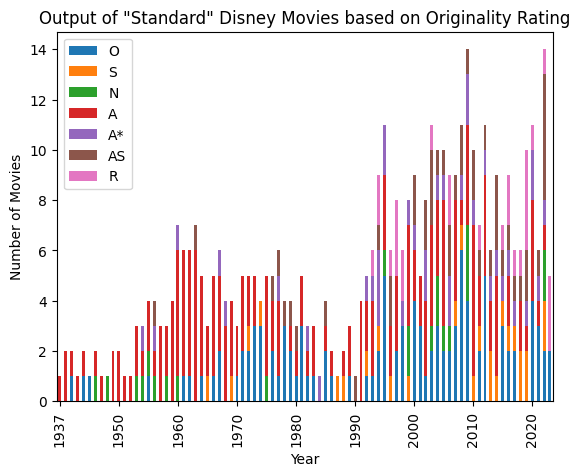

Index([1937, 1945, 1950, 1955, 1960, 1965, 1970, 1975, 1980, 1985, 1990, 1995,
       2000, 2005, 2010, 2015, 2020],
      dtype='int64', name='Year')

In [67]:
ax = originality_by_year.plot(kind='bar', stacked=True)

plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Output of "Standard" Disney Movies based on Originality Rating')

# adjust x axis ticks
x_values = originality_by_year.index
x_ticks = x_values[::5]
ax.xaxis.set_major_locator(MultipleLocator(base=10))

plt.legend()
plt.show()
x_values
x_ticks

In [56]:
fig = px.bar(originality_by_year)
fig.show()

In [68]:
fig = px.bar(simplified_by_year)
fig.show()

In [101]:
simplified_freq_by_year = clean_df.groupby(['Year','OG?']).size().reset_index(name='count')

total_counts = simplified_freq_by_year.groupby('Year')['count'].transform('sum')
simplified_freq_by_year['relative_frequency'] = simplified_freq_by_year['count'] / total_counts

simplified_freq_by_year = simplified_freq_by_year.pivot(index='Year', columns='OG?', values='relative_frequency')

simplified_og_order = ['Original', 'Adapt', 'Sequel', 'Reboot']
simplified_freq_by_year = simplified_freq_by_year[simplified_og_order]

In [100]:
hovertemplate = '%{value:.2%}'
fig = px.bar(simplified_freq_by_year, color_discrete_sequence=px.colors.qualitative.T10)
fig.update_traces(hovertemplate=hovertemplate)
fig.show()

## Branch Investment

In [111]:
branch_df = df.drop(columns='i')
#branch_df = branch_df[branch_df['Original?'].notna()]
branch_df = branch_df[branch_df['Branch'].isin(['Standard', 'Pixar', 'Lucasfilm', 'Marvel', 'Touchstone', 'Hollywood Pictures'])]

branch_by_year = branch_df.groupby(['Year','Branch']).size().reset_index(name='count')
branch_by_year = branch_by_year.pivot(index='Year', columns='Branch', values='count')

branch_order = ['Standard', 'Pixar', 'Marvel', 'Lucasfilm', 'Touchstone', 'Hollywood Pictures']
branch_by_year = branch_by_year[branch_order]

In [112]:
fig = px.bar(branch_by_year)
fig.show()